<a href="https://colab.research.google.com/github/piserushikesh/Gen_AI_Training/blob/main/simple_linear_regression_with_larger_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

## Importing the libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [25]:
dataset = pd.read_csv('Employee-salary-prediction.csv')
dataset.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# Number of Rows and Columns

In [26]:
dataset.shape

(375, 6)

# Columns

In [27]:
dataset.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

# Rename The column

In [28]:
dataset.columns = ['Age', 'Gender', 'Degree', 'Job_Title', 'Experience_years',
       'Salary']

In [29]:
dataset.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# Column Datatypes

In [30]:
dataset.dtypes

Age                 float64
Gender               object
Degree               object
Job_Title            object
Experience_years    float64
Salary              float64
dtype: object

# Information of Dataset:

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               373 non-null    float64
 1   Gender            373 non-null    object 
 2   Degree            373 non-null    object 
 3   Job_Title         373 non-null    object 
 4   Experience_years  373 non-null    float64
 5   Salary            373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


# Duplicate Records in data:

In [33]:
dataset[dataset.duplicated()]

,Age,Gender,Degree,Job_Title,Experience_years,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [34]:
dataset[dataset.duplicated()].shape

(50, 6)

# dropping Duplicates from the data:

In [35]:
dataset_1 = dataset.drop_duplicates(keep='first')

In [36]:
dataset_1.shape

(325, 6)

# Missing/Null value in each columns:

In [37]:
dataset_1.isnull().sum()

Age                 1
Gender              1
Degree              1
Job_Title           1
Experience_years    1
Salary              1
dtype: int64

# dropping Missing values from data:

In [38]:
dataset_1.dropna(how = 'any', inplace=True)

<ipython-input-38-4764afba7f77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_1.dropna(how = 'any', inplace=True)


In [39]:
dataset_1.shape

(324, 6)

# **Data Exploration and Visualization**

# Statistics of Numerical Columns

In [40]:
dataset_1.describe()

,Age,Experience_years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


# Correlation Matrix among Numerical Features:

In [41]:
corr = dataset_1[['Age','Experience_years','Salary']].corr()
corr

,Age,Experience_years,Salary
Age,1.000000,0.979192,0.916543
Experience_years,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


# Data Visualization - Bar Chart, Box plot, Histogram

<Axes: >

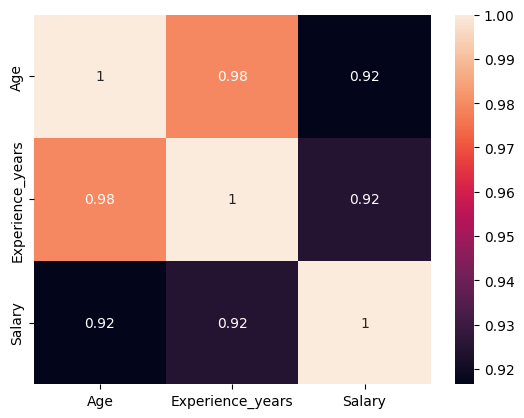

In [43]:
sns.heatmap(corr, annot=True)

# Data Visualization - Bar Chart, Box plot, Histogram

In [44]:
dataset_1['Degree'].value_counts()

Bachelor's    191
Master's       91
PhD            42
Name: Degree, dtype: int64

<Axes: >

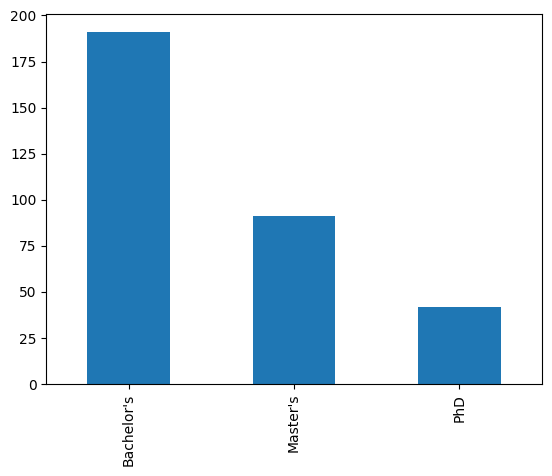

In [45]:
dataset_1['Degree'].value_counts().plot(kind = 'bar')

In [46]:
dataset_1['Job_Title'].value_counts()

Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: Job_Title, Length: 174, dtype: int64

<Axes: >

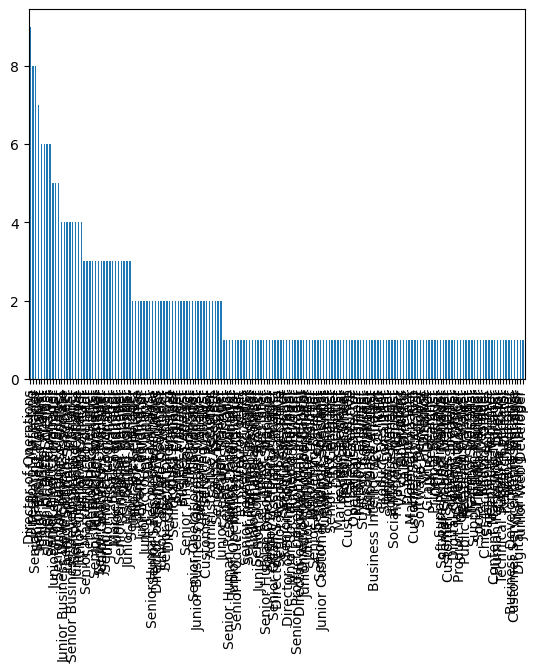

In [51]:
dataset_1['Job_Title'].value_counts().plot(kind = 'bar')

In [53]:
dataset_1['Job_Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

# Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [55]:
dataset_1['Age_scaled'] = std_scaler.fit_transform(dataset_1[['Age']])
dataset_1['Experience_years_scaled'] = std_scaler.fit_transform(dataset_1[['Experience_years']])

<ipython-input-55-20538833900f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_1['Age_scaled'] = std_scaler.fit_transform(dataset_1[['Age']])
<ipython-input-55-20538833900f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_1['Experience_years_scaled'] = std_scaler.fit_transform(dataset_1[['Experience_years']])


# Data After scalling

In [56]:
dataset_1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Age_scaled,Experience_years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,2.037324,1.497148


# Dependent and independent features:

In [62]:
X = dataset_1[['Experience_years']]
y = dataset_1['Salary']

In [63]:
X.head()

,Experience_years
0,5.0
1,3.0
2,15.0
3,7.0
4,20.0


# Splitting the data into Training and Testing:

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,Experience_years
73,2.0
182,15.0
17,12.0
24,13.0
146,16.0


# Model Development

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

# MODEL PREDICTIONS

In [66]:
y_predict = regressor.predict(X_test)
y_predict

array([113379.25443452, 127108.45183362,  58462.46483813,  99650.05703542,
        92785.45833588,  92785.45833588,  51597.86613858,  65327.06353768,
       175160.64273046,  41300.96808926,  44733.26743903, 120243.85313407,
        92785.45833588, 140837.64923272,  92785.45833588, 175160.64273046,
       113379.25443452, 133973.05053317,  51597.86613858,  44733.26743903,
        85920.85963633,  58462.46483813,  65327.06353768,  31004.07003993,
       202619.03752866,  79056.26093678, 133973.05053317, 168296.04403092,
       175160.64273046,  37868.66873948, 106514.65573497, 168296.04403092,
        99650.05703542, 154566.84663182, 133973.05053317,  41300.96808926,
        92785.45833588,  99650.05703542,  85920.85963633,  41300.96808926,
        99650.05703542,  51597.86613858, 113379.25443452,  58462.46483813,
        44733.26743903,  51597.86613858, 140837.64923272,  44733.26743903,
       147702.24793227,  79056.26093678, 182025.24143001,  44733.26743903,
        58462.46483813,  

In [70]:
df = pd.DataFrame({'y_Actual' : y_test, 'y_predicted': y_predict})
df['Error'] = df['y_Actual'] - df['y_predicted']
df

,y_Actual,y_predicted,Error
132,100000.0,113379.254435,-13379.254435
108,100000.0,127108.451834,-27108.451834
137,50000.0,58462.464838,-8462.464838
9,110000.0,99650.057035,10349.942965
181,105000.0,92785.458336,12214.541664
...,...,...,...
104,80000.0,120243.853134,-40243.853134
233,85000.0,85920.859636,-920.859636
60,170000.0,188889.840130,-18889.840130
94,75000.0,79056.260937,-4056.260937


In [71]:
df = pd.DataFrame({'y_Actual' : y_test, 'y_predicted': y_predict})
df['Error'] = df['y_Actual'] - df['y_predicted']
df['abs_error'] = abs(df['Error'])
Mean_absolute_Error = df['abs_error'].mean()
Mean_absolute_Error


11850.81040193959

# Visualization

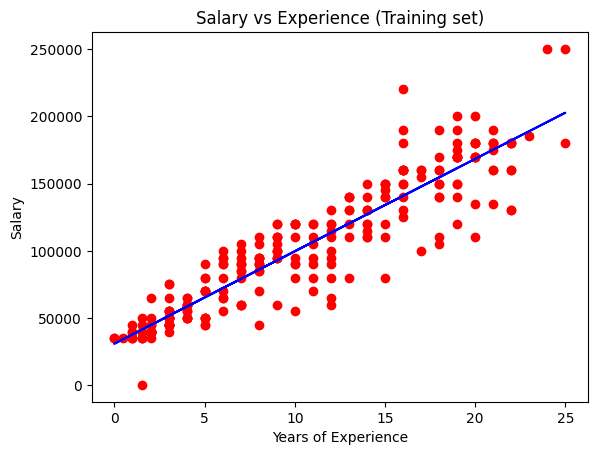

In [72]:
plt.scatter(X_train,y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# test set

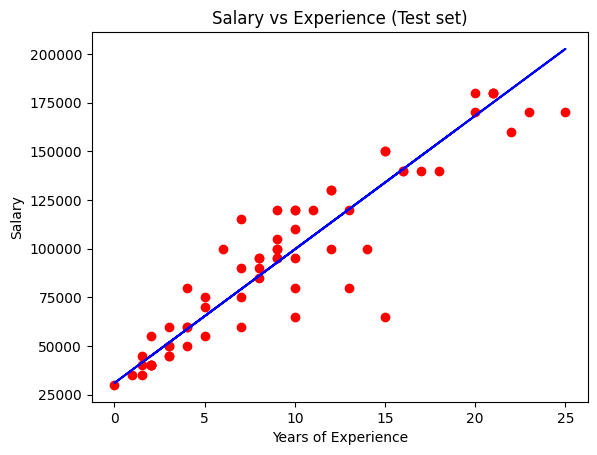

In [73]:
plt.scatter(X_test,y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()